###### 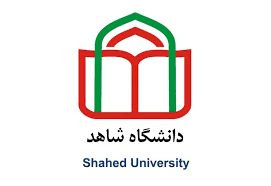

## Course: Artificial Neural Networks
#### Course Instructor: Professor Ali Moti Nasrabadi
#### Teaching Assistant: Hossein Pakdaman Moghaddam

# Python Dict and File

## Dict Hash Table
Python's efficient key/value hash table structure is called a "dict". The contents of a dict can be written as a series of key:value pairs within braces { }, e.g. dict = {key1:value1, key2:value2, ... }. The "empty dict" is just an empty pair of curly braces {}.

Looking up or setting a value in a dict uses square brackets, e.g. dict['foo'] looks up the value under the key 'foo'. Strings, numbers, and tuples work as keys, and any type can be a value. Other types may or may not work correctly as keys (strings and tuples work cleanly since they are immutable). Looking up a value which is not in the dict throws a KeyError -- use "in" to check if the key is in the dict, or use dict.get(key) which returns the value or None if the key is not present (or get(key, not-found) allows you to specify what value to return in the not-found case).

In [3]:
## Can build up a dict by starting with the empty dict {}
  ## and storing key/value pairs into the dict like this:
  ## dict[key] = value-for-that-key
dict = {}
dict['a'] = 'alpha'
dict['g'] = 'gamma'
dict['o'] = 'omega'

print(dict)

{'a': 'alpha', 'g': 'gamma', 'o': 'omega'}


In [4]:
print(dict['a'])     ## Simple lookup, returns 'alpha'


alpha


In [5]:
dict['a'] = 6       ## Put new key/value into dict


In [6]:
'a' in dict         ## True


True

In [7]:
print(dict['z'])                  ## Throws KeyError


KeyError: 'z'

In [9]:
if 'z' in dict: print(dict['z'])     ## Avoid KeyError


In [10]:
print(dict.get('z'))  ## None (instead of KeyError)


None


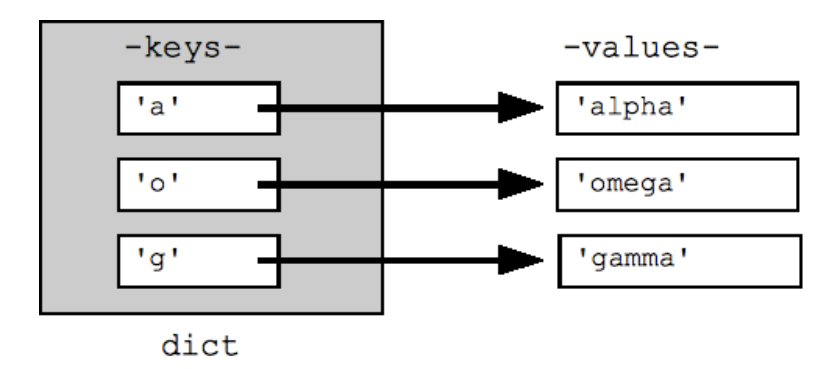

A for loop on a dictionary iterates over its keys by default. The keys will appear in an arbitrary order. The methods dict.keys() and dict.values() return lists of the keys or values explicitly. There's also an items() which returns a list of (key, value) tuples, which is the most efficient way to examine all the key value data in the dictionary. All of these lists can be passed to the sorted() function.

In [11]:
## By default, iterating over a dict iterates over its keys.
## Note that the keys are in a random order.
for key in dict:
 print(key)

a
g
o


In [12]:
## Exactly the same as above
for key in dict.keys():
 print(key)

a
g
o


In [13]:
## Get the .keys() list:
print(dict.keys())

dict_keys(['a', 'g', 'o'])


In [14]:
## Likewise, there's a .values() list of values
print(dict.values())

dict_values([6, 'gamma', 'omega'])


In [15]:
## Common case -- loop over the keys in sorted order,
## accessing each key/value
for key in sorted(dict.keys()):
 print(key, dict[key])

a 6
g gamma
o omega


In [16]:
## .items() is the dict expressed as (key, value) tuples
print(dict.items())

dict_items([('a', 6), ('g', 'gamma'), ('o', 'omega')])


In [17]:
## This loop syntax accesses the whole dict by looping
## over the .items() tuple list, accessing one (key, value)
## pair on each iteration.
for k, v in dict.items(): print(k, '>', v)

a > 6
g > gamma
o > omega


Strategy note: from a performance point of view, the dictionary is one of your greatest tools, and you should use it where you can as an easy way to organize data. For example, you might read a log file where each line begins with an IP address, and store the data into a dict using the IP address as the key, and the list of lines where it appears as the value. Once you've read in the whole file, you can look up any IP address and instantly see its list of lines. The dictionary takes in scattered data and makes it into something coherent.

## Dict Formatting
The % operator works conveniently to substitute values from a dict into a string by name:

In [22]:
h = {}
h['word'] = 'garfield'
h['count'] = 42
s = 'I want %(count)d copies of %(word)s' % h  # %d for int, %s for string
# 'I want 42 copies of garfield'

In [23]:
s

'I want 42 copies of garfield'

## Del
The "del" operator does deletions. In the simplest case, it can remove the definition of a variable, as if that variable had not been defined. Del can also be used on list elements or slices to delete that part of the list and to delete entries from a dictionary.

In [26]:
var = 6
del var  # var no more!

list = ['a', 'b', 'c', 'd']
del list[0]     ## Delete first element
del list[-2:]   ## Delete last two elements
print(list)      ## ['b']

['b']


In [27]:
dict = {'a':1, 'b':2, 'c':3}
del dict['b']   ## Delete 'b' entry
print(dict)      ## {'a':1, 'c':3}

{'a': 1, 'c': 3}


## Files
The open() function opens and returns a file handle that can be used to read or write a file in the usual way. The code f = open('name', 'r') opens the file into the variable f, ready for reading operations, and use f.close() when finished. Instead of 'r', use 'w' for writing, and 'a' for append. The standard for-loop works for text files, iterating through the lines of the file (this works only for text files, not binary files). The for-loop technique is a simple and efficient way to look at all the lines in a text file:

In [29]:
# Echo the contents of a text file
f = open('foo.txt', 'rt', encoding='utf-8')
for line in f:   ## iterates over the lines of the file
 print(line, end='')    ## end='' so print does not add an end-of-line char
                           ## since 'line' already includes the end-of-line.
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'foo.txt'

Reading one line at a time has the nice quality that not all the file needs to fit in memory at one time -- handy if you want to look at every line in a 10 gigabyte file without using 10 gigabytes of memory. The f.readlines() method reads the whole file into memory and returns its contents as a list of its lines. The f.read() method reads the whole file into a single string, which can be a handy way to deal with the text all at once, such as with regular expressions we'll see later.

For writing, f.write(string) method is the easiest way to write data to an open output file. Or you can use "print" with an open file like "print(string, file=f)".

## Files Unicode
To read and write unicode encoded files use a `'t'` mode and explicitly specify an encoding:

In [30]:
with open('foo.txt', 'rt', encoding='utf-8') as f:
  for line in f:
    # here line is a *unicode* string

with open('write_test', encoding='utf-8', mode='wt') as f:
    f.write('\u20ACunicode\u20AC\n') #  €unicode€
    # AKA print('\u20ACunicode\u20AC', file=f)  ## which auto-adds end='\n'

IndentationError: expected an indented block after 'for' statement on line 2 (3098539093.py, line 5)

## Exercise Incremental Development
Building a Python program, don't write the whole thing in one step. Instead identify just a first milestone, e.g. "well the first step is to extract the list of words." Write the code to get to that milestone, and just print your data structures at that point, and then you can do a sys.exit(0) so the program does not run ahead into its not-done parts. Once the milestone code is working, you can work on code for the next milestone. Being able to look at the printout of your variables at one state can help you think about how you need to transform those variables to get to the next state. Python is very quick with this pattern, allowing you to make a little change and run the program to see how it works. Take advantage of that quick turnaround to build your program in little steps.